In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [18]:
df=pd.read_csv('toxicity_.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
1,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
2,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
3,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
4,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,4412b93f983379a4,"Sam, get real! No-one's gunner believe all thi...",0,0,0,0,0,0
9996,7c1bd75a71704cc2,Get a life \n\nwhy dont you go get a life and ...,1,0,0,0,1,0
9997,45eed1057ea7a582,"Nothing a sock puppet(and trust me, I know wha...",0,0,0,0,0,0
9998,f9718cf5cbdd9a25,"""\nThe lead section is a summary of the main p...",0,0,0,0,0,0


In [19]:
df.shape

(10000, 8)

In [20]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [21]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [22]:
#removing unwanted columns
df.drop(['id','severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace=True)
df

,comment_text,toxic
0,"Geez, are you forgetful! We've already discus...",0
1,Carioca RFA \n\nThanks for your support on my ...,0
2,"""\n\n Birthday \n\nNo worries, It's what I do ...",0
3,Pseudoscience category? \n\nI'm assuming that ...,0
4,"(and if such phrase exists, it would be provid...",0
...,...,...
9995,"Sam, get real! No-one's gunner believe all thi...",0
9996,Get a life \n\nwhy dont you go get a life and ...,1
9997,"Nothing a sock puppet(and trust me, I know wha...",0
9998,"""\nThe lead section is a summary of the main p...",0


In [23]:
#remove duplicates
df.drop_duplicates()

,comment_text,toxic
0,"Geez, are you forgetful! We've already discus...",0
1,Carioca RFA \n\nThanks for your support on my ...,0
2,"""\n\n Birthday \n\nNo worries, It's what I do ...",0
3,Pseudoscience category? \n\nI'm assuming that ...,0
4,"(and if such phrase exists, it would be provid...",0
...,...,...
9995,"Sam, get real! No-one's gunner believe all thi...",0
9996,Get a life \n\nwhy dont you go get a life and ...,1
9997,"Nothing a sock puppet(and trust me, I know wha...",0
9998,"""\nThe lead section is a summary of the main p...",0


In [24]:
df.dtypes

comment_text    object
toxic            int64
dtype: object

In [25]:
df1=df['toxic'].value_counts()
df1

toxic
0    9058
1     942
Name: count, dtype: int64

<BarContainer object of 2 artists>

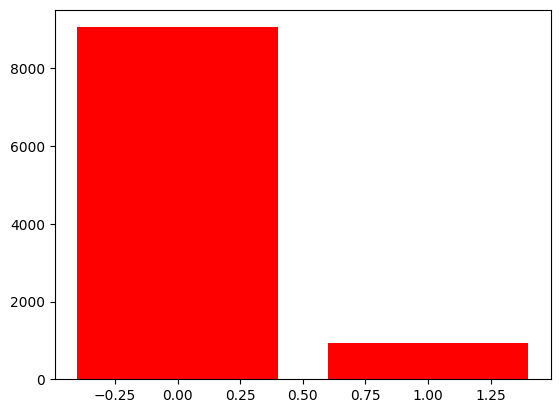

In [26]:
plt.bar(df1.index,df1.values,color='r')

In [27]:
toxic=df.comment_text
toxic



0       Geez, are you forgetful!  We've already discus...
1       Carioca RFA \n\nThanks for your support on my ...
2       "\n\n Birthday \n\nNo worries, It's what I do ...
3       Pseudoscience category? \n\nI'm assuming that ...
4       (and if such phrase exists, it would be provid...
                              ...                        
9995    Sam, get real! No-one's gunner believe all thi...
9996    Get a life \n\nwhy dont you go get a life and ...
9997    Nothing a sock puppet(and trust me, I know wha...
9998    "\nThe lead section is a summary of the main p...
9999    New users \nDear Mike, \nit´s not good idea to...
Name: comment_text, Length: 10000, dtype: object

In [28]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
toxic=toxic.apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
toxic

0       Geez , are you forgetful ! We've already discu...
1       Carioca RFA Thanks for your support on my requ...
2       " Birthday No worries , It's what I do ;) Enjo...
3       Pseudoscience category ? I'm assuming that thi...
4       ( and if such phrase exists , it would be prov...
                              ...                        
9995    Sam , get real ! No-one's gunner believe all t...
9996    Get a life why dont you go get a life and stop...
9997    Nothing a sock puppet ( and trust me , I know ...
9998    " The lead section is a summary of the main po...
9999    New users Dear Mike , it ´ s not good idea to ...
Name: comment_text, Length: 10000, dtype: object

In [30]:
#remove special characters
toxic=toxic.replace('[^a-zA-Z0-9]',' ',regex=True)
toxic

0       Geez   are you forgetful   We ve already discu...
1       Carioca RFA Thanks for your support on my requ...
2         Birthday No worries   It s what I do    Enjo...
3       Pseudoscience category   I m assuming that thi...
4         and if such phrase exists   it would be prov...
                              ...                        
9995    Sam   get real   No one s gunner believe all t...
9996    Get a life why dont you go get a life and stop...
9997    Nothing a sock puppet   and trust me   I know ...
9998      The lead section is a summary of the main po...
9999    New users Dear Mike   it   s not good idea to ...
Name: comment_text, Length: 10000, dtype: object

In [31]:
#removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
toxic=toxic.apply(lambda x: [i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
toxic

0       Geez forgetful We already discussed Marx anarc...
1       Carioca RFA Thanks support request adminship T...
2            Birthday No worries It I Enjoy ur day talk e
3       Pseudoscience category I assuming article pseu...
4       phrase exists would provided search engine eve...
                              ...                        
9995    Sam get real No one gunner believe stuff hidde...
9996    Get life dont go get life stop editing article...
9997    Nothing sock puppet trust I know means sure fi...
9998    The lead section summary main points mentions ...
9999    New users Dear Mike good idea block new users ...
Name: comment_text, Length: 10000, dtype: object

In [32]:
#separating input and output
x=df['comment_text']
y=df['toxic']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train


9069              Hi\n\nHello, Miranda!  Nice to see you!
2603                              You \n\nAre an *****le!
7738    Yes, it was probably him. I only put the name ...
1579    "\n\nNPOV\nI have tagged this article as POV b...
5058    Biased Moderators \n\nThe following users over...
                              ...                        
5734    "\n\nSomething sinister \nBlar Blar! ''lemming...
5191    . Here's the link to follow up on the proof of...
5390    This is the end for me. I will never forget or...
860     Where are the Lesbians!?!? \n\nI didn't watch ...
7270                      When is the best time to prune?
Name: comment_text, Length: 7000, dtype: object

In [35]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=10000,stop_words='english',ngram_range=(1,2))
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.fit_transform(x_test)

In [36]:
#bulding logistic regressiom model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear',class_weight='balanced',max_iter=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [41]:
#evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(
      y_test,
      y_pred,
      target_names=['toxic','non-toxic']))

              precision    recall  f1-score   support

       toxic       0.90      0.98      0.94      2712
   non-toxic       0.13      0.03      0.05       288

    accuracy                           0.89      3000
   macro avg       0.52      0.50      0.50      3000
weighted avg       0.83      0.89      0.85      3000



In [42]:
print(confusion_matrix(y_test,y_pred))
print('\n',accuracy_score(y_test,y_pred))

[[2652   60]
 [ 279    9]]

 0.887


In [43]:
#save file in pickle model
import pickle
pickle.dump(vectorizer,open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(model,open("toxic_model", "wb"))

print("TF-IDF",'toxic model saved succesfully')

TF-IDF toxic model saved succesfully
